<a href="https://colab.research.google.com/github/siddmittal/Chat-API-NET/blob/master/cat_dog_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load Dataset

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2023-02-28 19:26:35--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.107.128, 173.194.218.128, 108.177.11.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.107.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   157MB/s    in 0.4s    

2023-02-28 19:26:35 (157 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



The contents of the .zip are extracted to the base directory `/tmp/cats_and_dogs_filtered`, which contains `train` and `validation` subdirectories for the training and validation datasets for a refresher on training, validation, and test sets), which in turn each contain `cats` and `dogs` subdirectories. Let's define each of these directories:

In [ ]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

Epoch 1/10
63/63 [==============================] - 117s 2s/step - loss: 28.1173 - accuracy: 0.5250 - val_loss: 0.6927 - val_accuracy: 0.5300
Epoch 2/10
63/63 [==============================] - 118s 2s/step - loss: 0.6603 - accuracy: 0.6070 - val_loss: 0.7231 - val_accuracy: 0.5260
Epoch 3/10
63/63 [==============================] - 117s 2s/step - loss: 0.6106 - accuracy: 0.6595 - val_loss: 0.7201 - val_accuracy: 0.5680
Epoch 4/10
63/63 [==============================] - 120s 2s/step - loss: 0.5397 - accuracy: 0.7245 - val_loss: 0.7595 - val_accuracy: 0.5420
Epoch 5/10
63/63 [==============================] - 111s 2s/step - loss: 0.4406 - accuracy: 0.7915 - val_loss: 0.9104 - val_accuracy: 0.5670
Epoch 6/10
63/63 [==============================] - 120s 2s/step - loss: 0.3590 - accuracy: 0.8345 - val_loss: 0.9485 - val_accuracy: 0.5530
Epoch 7/10
63/63 [==============================] - 123s 2s/step - loss: 0.2899 - accuracy: 0.8625 - val_loss: 1.1612 - val_accuracy: 0.5670
Epoch 8/10
6

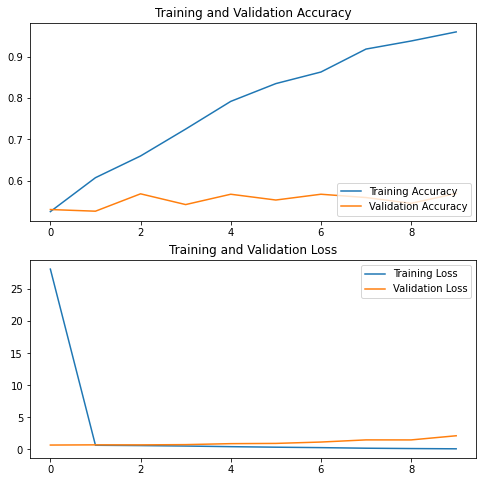

In [4]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

# Define constants
IMG_WIDTH = 150
IMG_HEIGHT = 150
NUM_CHANNELS = 3
NUM_CLASSES = 2
BATCH_SIZE = 32
NUM_EPOCHS = 10

# Define the path to the dataset
train_dir = "/tmp/cats_and_dogs_filtered/train"
test_dir = "/tmp/cats_and_dogs_filtered/validation"

# Define a function to load the images
def load_images(directory):
    images = []
    labels = []
    for category in os.listdir(directory):
        path = os.path.join(directory, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            try:
                image = cv2.imread(img_path)
                image = cv2.resize(image, (IMG_WIDTH, IMG_HEIGHT))
                images.append(image)
                if category == "cats":
                    labels.append(0)
                else:
                    labels.append(1)
            except Exception as e:
                pass
    return np.array(images), np.array(labels)

# Load the training and testing images
train_images, train_labels = load_images(train_dir)
test_images, test_labels = load_images(test_dir)

# Define the CNN architecture
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_WIDTH, IMG_HEIGHT, NUM_CHANNELS)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(train_images, train_labels, batch_size=BATCH_SIZE, epochs=NUM_EPOCHS, validation_data=(test_images, test_labels))

# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

# Plot the accuracy and loss over epochs
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(NUM_EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


# Take top 10 images from the test_images and show their classification results

1/1 [==============================] - 0s 392ms/step


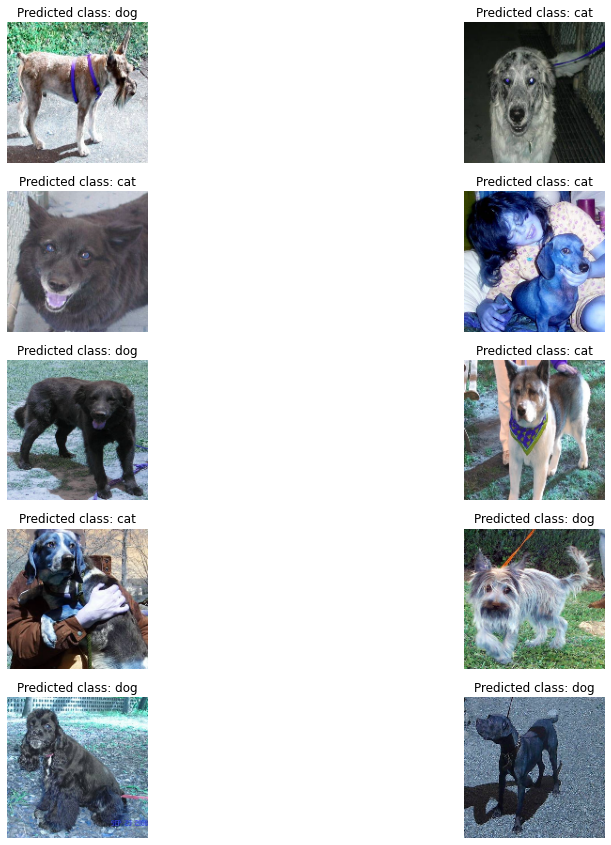

In [5]:
# Take the top 10 images from the test set
top_10_images = test_images[:10]

# Predict the class labels for the top 10 images using the trained model
predictions = model.predict(top_10_images)

# Get the predicted class labels as integers
predicted_labels = np.argmax(predictions, axis=1)

# Define a list of class names
class_names = ['cat', 'dog']

# Display the top 10 images and their predicted class labels
plt.figure(figsize=(15, 15))
for i in range(len(top_10_images)):
    # Display the image
    plt.subplot(5, 2, i+1)
    plt.imshow(top_10_images[i])
    plt.axis('off')
    # Display the predicted class label
    predicted_class = class_names[predicted_labels[i]]
    plt.title(f"Predicted class: {predicted_class}")
plt.show()
